In [92]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



def generar_datos(cantidad_instancias):
    ## Valores
    presion_arterial= np.random.uniform(100,120,cantidad_instancias)
    valores_colesterol= np.random.uniform(120,250,cantidad_instancias) # 800 instancias empieza en segundo 0 y termina en segundo 59
    edad= np.random.uniform(40,50,cantidad_instancias) # valores de 40 a 80 años de edad
    return presion_arterial,valores_colesterol,edad



def calculo_probabilidades(X,Y,Z):
    min_presion_arterial=min(X)
    max_presion_arterial=max(X)

    min_valores_colesterol= min(Y)
    max_valores_colesterol= max(Y)

    min_edad= min(edad)
    max_edad=max(edad)

    propabilidad_de_problema_arterial= (X - min_presion_arterial)/(max_presion_arterial-min_presion_arterial)
    probabilidad_de_problema_colesterol = (Y-min_valores_colesterol)/(max_valores_colesterol-min_valores_colesterol)
    probabilidad_de_problema_edad= (Z-min_edad)/(max_edad-min_edad)

    probabilidad_de_tener_problemas_cardiovasculares= propabilidad_de_problema_arterial* probabilidad_de_problema_colesterol*probabilidad_de_problema_edad

    return probabilidad_de_tener_problemas_cardiovasculares




if __name__=='__main__':
    catidad_intancias=800
    #1) Generar datasets sintetico 800
    presion_arterial,valores_colesterol,edad=generar_datos(800) # 800 instancias

    #2) Para cada instancia de calcula la probabilidad de tener problemas vasculares
    probabilidades_instancia_de_tener_problemas=calculo_probabilidades(presion_arterial,valores_colesterol,edad)
    print(f'Las probabilidades de tener problemas vasculares es \n {probabilidades_instancia_de_tener_problemas}')

    

Las probabilidades de tener problemas vasculares es 
 [1.71430011e-02 1.70122671e-02 1.07394348e-01 3.31735226e-01
 0.00000000e+00 1.08992001e-01 1.32824196e-01 2.91660181e-01
 1.86384012e-03 1.94589867e-02 1.31870524e-04 5.36479295e-03
 5.90782590e-02 3.00476869e-03 1.40832061e-02 2.10628764e-01
 2.86872947e-02 1.11256244e-01 2.64381698e-01 2.26252259e-01
 6.26088860e-03 9.16540276e-03 3.34128671e-01 5.12764134e-04
 1.71358753e-01 2.02096602e-01 1.12975935e-02 6.29085130e-03
 2.14088105e-02 1.80708809e-01 2.23065748e-03 8.05786529e-02
 8.38093207e-01 1.14608242e-01 6.96149508e-03 5.11554398e-02
 5.27729294e-02 2.06462751e-01 1.28819921e-01 1.36573971e-02
 5.42619256e-02 1.85226031e-01 3.25355396e-04 5.85160426e-02
 1.07138852e-01 6.26115864e-01 2.77968396e-01 4.33891810e-04
 5.45856257e-03 7.87693712e-03 2.77819913e-02 2.67511707e-04
 2.87055080e-02 4.08329228e-01 4.27484527e-02 2.03395466e-04
 7.94188287e-02 3.61940496e-01 5.14763481e-02 3.35352882e-02
 3.25434427e-01 1.16544397e-03 

In [93]:
#3) Nos basamos en el humbral de 0.4 es decir que si es mayor a 0.4  se tiene un problema cardiovascular

def umbral(valor):
        if valor >0.40:
                return 1
        else:
                return 0


if __name__=='__main__':
        instancias_con_clases_determinadas= np.vectorize(umbral)(probabilidades_instancia_de_tener_problemas)
        print(instancias_con_clases_determinadas)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

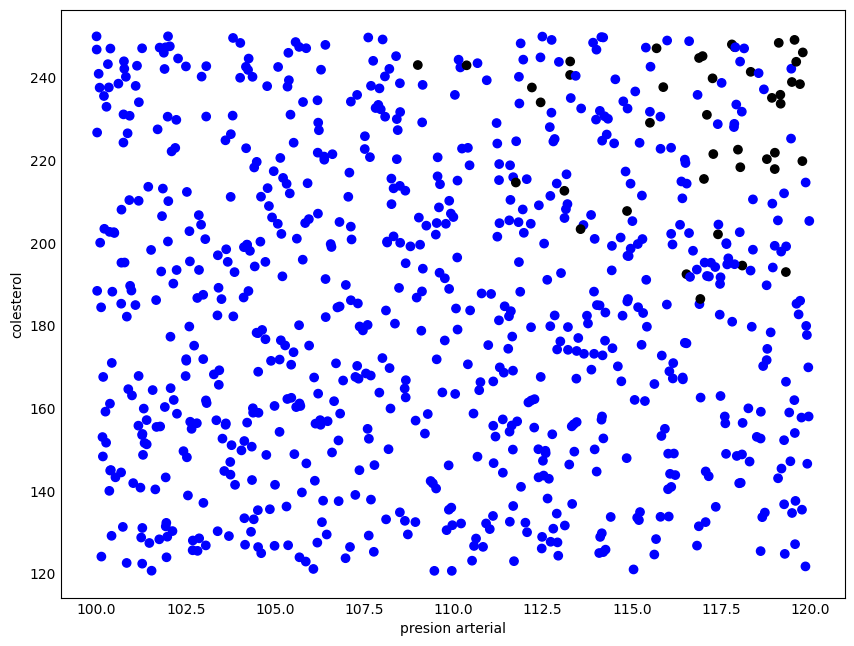

In [94]:
#4) 

def  graficar(presion_arterial,valores_colesterol,instancias_con_clases_determinadas):

    plt.figure(figsize=(8, 6))
    #puntos originales generados por nosotros
    plt.scatter(presion_arterial,valores_colesterol,c=['blue' if i==0 else 'black' for i in instancias_con_clases_determinadas])

    #etiquetas
    plt.xlabel("presion arterial")
    plt.ylabel("colesterol")


    plt.show()

if  __name__ == "__main__":
    graficar(presion_arterial,valores_colesterol,instancias_con_clases_determinadas)

# tiene coherencia que al mayor colesterol mayor presion arterial
    


    

In [95]:
#5
if __name__=='__main__':
    
    #para entrenar tenemos tres campos y las clases por tanto
    inputs=np.column_stack((presion_arterial,valores_colesterol,edad))
    prediccion_para_entrenar_modelo= instancias_con_clases_determinadas

    #modelo
    clf= LogisticRegression(random_state=0).fit(inputs,prediccion_para_entrenar_modelo)

    #predicciones
    predicciones_de_salida_modelo=clf.predict(inputs[:,:])
    print(predicciones_de_salida_modelo)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

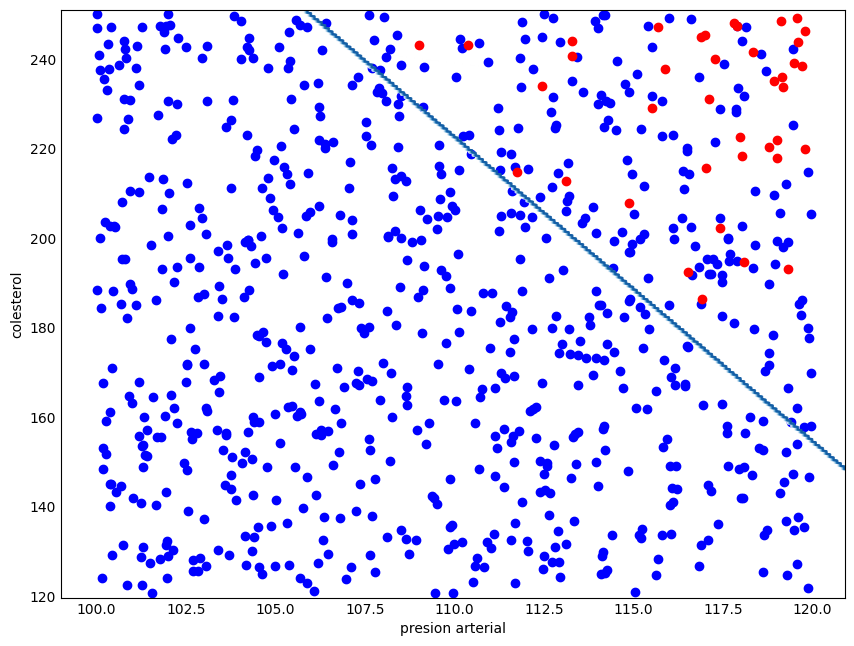

In [104]:
#6

#funcion para graficar predicciones y recta de regresion logistica
def graficar_predicciones_y_linea_regresion_logistica(presion_arterial,valores_colesterol,edad,inputs,predicciones_de_salida_modelo):

    #para colocar mas grande
    plt.figure(figsize=(8, 6))

    # Separar los puntos según su clase
    clase_0 = inputs[predicciones_de_salida_modelo == 0]
    clase_1 = inputs[predicciones_de_salida_modelo == 1]

    # graficar puntos de clase
    plt.scatter(clase_0[:, 0], clase_0[:, 1], color='blue', label='Clase 0')
    plt.scatter(clase_1[:, 0], clase_1[:, 1], color='red', label='Clase 1')

    # frontera de desicion
    x_min, x_max = presion_arterial.min() - 1, presion_arterial.max() + 1
    y_min, y_max = valores_colesterol.min() - 1, valores_colesterol.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    
    #predicciones
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), np.max(edad))])
    Z = Z.reshape(xx.shape)

    #graficar predicciones en la malla
    plt.contour(xx, yy, Z, alpha=0.8)

    #etiquetas
    plt.xlabel("presion arterial")
    plt.ylabel("colesterol")

    plt.show()







if __name__=='__main__':
    graficar_predicciones_y_linea_regresion_logistica(presion_arterial,valores_colesterol,edad,inputs,predicciones_de_salida_modelo);

    

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

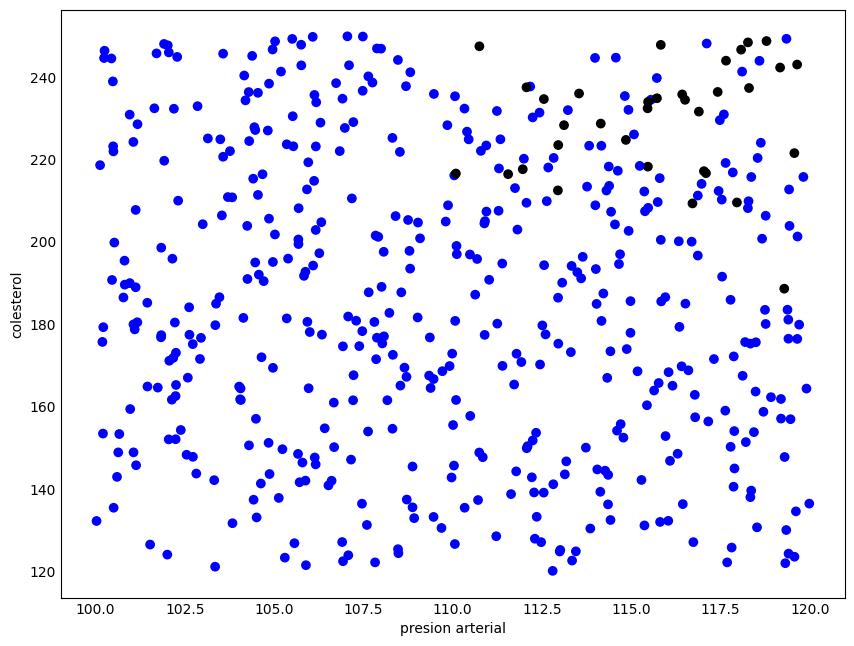

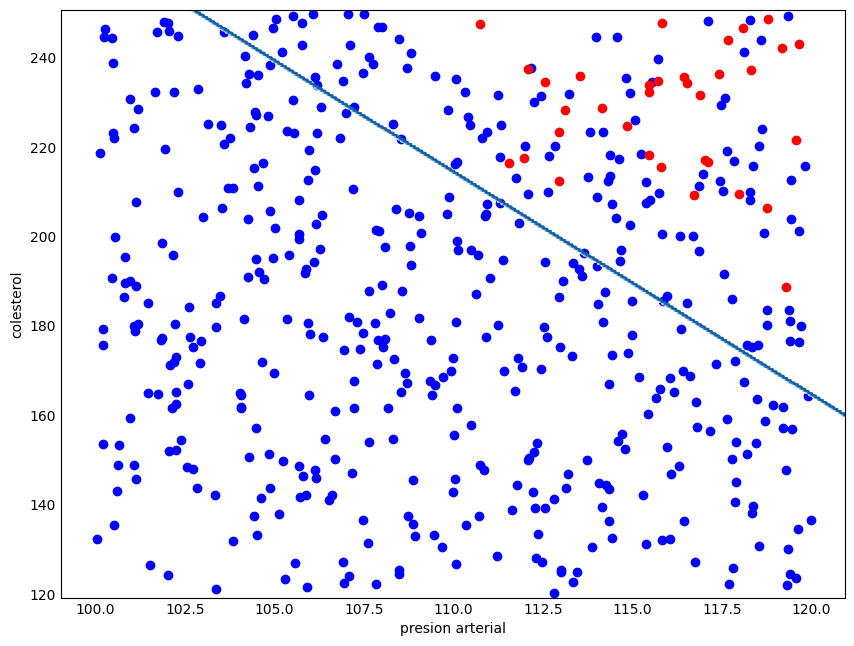

In [107]:
# 7) generar regresion para 500 nuevas instancias

if __name__=='__main__':   #generamos los datos de 500 instacias nuevas
    presion_arterial_nuevos,valores_colesterol_nuevos,edad_nuevos=generar_datos(500)

    #calculamos las probabilidades para las 500 instancias nuevas
    probabilidades_instancia_de_tener_problemas_nuevos= calculo_probabilidades(presion_arterial_nuevos,valores_colesterol_nuevos,edad_nuevos)

    #definido el umbral anteriormente aplicamos 0 y 1 en para las nuevas probabilidades
    instancias_con_clases_determinadas_nuevas= np.vectorize(umbral)(probabilidades_instancia_de_tener_problemas_nuevos)

    #para entrenar el modelo nuevo utilizamos los nuevos datos generados
    inputs_nuevos=np.column_stack((presion_arterial_nuevos,valores_colesterol_nuevos,edad_nuevos))
    prediccion_para_entrenar_modelo_nuevo= instancias_con_clases_determinadas_nuevas


    #modelo
    clf= LogisticRegression(random_state=0,C=12.0).fit(inputs_nuevos,prediccion_para_entrenar_modelo_nuevo)

    #predicciones
    predicciones_de_salida_modelo_nuevos=clf.predict(inputs_nuevos[:,:])
    print(predicciones_de_salida_modelo_nuevos)
    
    

    #graficamos los resultados
    graficar(presion_arterial_nuevos,valores_colesterol_nuevos,predicciones_de_salida_modelo_nuevos);
    graficar_predicciones_y_linea_regresion_logistica(presion_arterial_nuevos,valores_colesterol_nuevos,edad_nuevos,inputs_nuevos,prediccion_para_entrenar_modelo_nuevo);

